# 0. Mean-variance optimization 均值方差优化
Mean-variance optimization is based on Harry Markowitz’s 1952 classic paper, which spearheaded the transformation of portfolio management from an art into a science. The key insight is that by combining assets with different expected returns and volatilities, one can decide on a mathematically optimal allocation.
>均值方差优化基于 Harry Markowitz 1952 年的经典论文，该论文率先将投资组合管理从一门艺术转变为一门科学。关键的结论是，通过组合具有不同预期回报和波动率的资产，我们就可以决定数学上的最优配置。

If w is the weight vector of stocks with expected returns μ, then the portfolio return is equal to each stock’s weight multiplied by its return, i.e wTμ. The portfolio risk in terms of the covariance matrix Σ is given by wTΣw. Portfolio optimization can then be regarded as a convex optimization problem, and a solution can be found using quadratic programming. If we denote the target return as μ∗, the precise statement of the long-only portfolio optimization problem is as follows:
>如果 w 是期望收益为 μ 的股票的权重向量，则投资组合收益等于每只股票的权重乘以其收益，即 wTμ。以协方差矩阵 Σ 表示的投资组合风险由 wTΣw 给出。投资组合优化可以看作是一个凸优化问题，并且可以使用二次规划找到解决方案。如果我们将目标收益表示为 μ∗，则多头投资组合优化问题的精确表述如下：

$$
\begin{array}{cl}
\text { minimise } & w^{T} \Sigma w \\
\text { subject to } & w^{T} \mu \geq \mu^{*} \\
& w^{T} \mathbf{1}=1 \\
& w_{i} \geq 0
\end{array}
$$

If we vary the target return, we will get a different set of weights (i.e a different portfolio) – the set of all these optimal portfolios is referred to as the efficient frontier.
>如果我们改变目标回报，我们将得到一组不同的权重（即不同的投资组合）——所有这些最优投资组合的集合被称为有效边界。
<img height="521" src="media/img.png" width="785"/>

# 1. 均值方差模型实践

## 1.1 前言

  分散化方法，是指投资者根据不同的约束条件，将资金按照一定的方式分配在不同种类的资产、策略、因子组合上，以期实现收益和风险之间的合理权衡，完成其投资目标的过程。作为投资中的关键环节，分散化方法对投资组合的业绩有直接影响。因此，对各种分散化方法的研究，在学术和实务中都有重要意义。

  投资界有一句名言，不要把鸡蛋放在同一个篮子里。这句话充分反映了分散化投资的重要性。但在早期的投资过程中，人们对分散风险只有较为模糊的概念，分散的手段仅仅体现在资产种类上。例如，对资产权重采用静态配置方法，如等权、股债 60/40 配置等。静态配置方法并不涉及对资产收益和风险的预测，更不需要在此之间做权衡。

  马克维茨提出的均值方差理论首次将收益和风险通过优化的方式进行了系统性地研究，这极大推动了分散化方法在学术和实业界的发展，从而奠定了现代资产定价理论的基础。马克维茨的均值方差模型，首次将对未来收益和风险的预测模型化，在给定风险下，寻找最大化收益的组合。但理论的完美无法保证实际应用的有效，均值方差模型对输入参数非常敏感，结果对收益的预测尤其依赖。此后，越来越多的研究开始围绕其改进的方法展开。

  一种是通过各种算法来降低模型对输入参数的敏感性，并通过在优化过程中引入约束条件来进一步提高模型的稳定性，某种意义上，BL 模型便是这样的代表。高盛的 Fisher Black和 Robert Litterman 提出，在均值方差的基础上，通过引入主观观点与观点收益率的信心水平，减少了对输入参数的敏感性，提高模型稳定性。

  另一种思路则是逐渐降低对收益预测的依赖，将关注点放在了风险上，分散化理念逐渐转化成为了一种风险管理的方法，只针对风险进行配置。Haugen 和 Barker 提出最小方差组合配置方法，最小方差组合为均值方差的特殊情形，旨在最小化整个组合的风险；Qian 提出风险平价概念，力图使得构成组合的各个资产对组合整体风险贡献度相等；Choueifaty 和 Coignard 提出最大分散化配置方法，他们引入分散比率这一概念，模型的目标为最大化该比率；Leote De Carvalho 等人提出波动率倒数加权模型，各资产配置权重与资产的波动率倒数成反比。在这些风险模型中，除最小方差组合之外，各模型组合一般均不处于有效边界之上（资产满足一定条件除外），这就意味着，他们并不一定是理论最优配置，但在实际应用中则取得较为稳定效果。针对这一现象，有学者提出用行为金融学的杠杆规避来解释：很多投资者在实际投资中面临很多约束，无法使用杠杆，只能通过配置风险大的资产来实现风险暴露，这样导致风险大的资产经风险调整后的收益率较低，而风险小的资产则较高。各种风险预算模型在风险小的资产权重配置较大，故实际应用中取得较好的效果。

## 1.2 均值方差模型的实施路径

在选取实施路径的时候，计划在资产、策略、因子间进行分散配置，综合各类资产的特性以及资产在投资中的可操作性，决定选择ETF作为资产、策略以及因子分散配置的资产标的，选择ETF主要有以下几方面的考虑。

ETF 产品因为交易费用低、操作便捷、规则透明等优点，已经成为市场上越来越重要的投资工具。从统计数据来看，截止到 2021 年全市场 ETF 产品已经超过 600 只，仅 2021 年内新成立的 ETF 数量就超过了 270 只。首先 ETF 产品的手续费低、适应高频调仓，相比于主动基金能够实现月度乃至周度的快速调仓；其次是 ETF 种类不断丰富，从基础的股票债券以及货币 ETF，再到不断扩充的商品期货 ETF，可投资标的类型逐渐增加；最后是权益类 ETF 可以跟踪股票市场热点，能够覆盖绝大多数的宽基以及行业主题指数。从 ETF 产品存续情况来看，构建ETF 组合需要面对关键问题：如何在资产类型不够丰富的情况下构建资产配置组合。从可投资标的来看，ETF 产品主要存在股票、债券、黄金和货币基金四种资产，其他诸如豆粕、有色、能源化工 ETF 的规模普遍低于 5 亿，难以进行大规模配置。所以想要实现 ETF 组合策略，需要构建有效的股债黄金资产配置模型。

因此，在构建均值方差模型时，拟使用规模大于5亿元的ETF作为组合资产，并使用python的PyPortfolioOpt库对组合执行均值方差优化。获取组合资产数据时，使用AKshare库的API获取全市场ETF场内基金收盘价数据，其他使用到的库包括Pandas、matplotlib、numpy等。本均值方差模型运行的环境为windows7操作系统，python==3.8.13。

具体实施路径如下：

- Downloading data and getting it into PyPortfolioOpt
> 下载数据并将数据提供给PyPortfolioOpt模块

- Calculating and visualising the covariance matrix
> 计算并可视化协方差矩阵

- Optimising a long/short portfolio to minimise total variance
> 优化多头/空头投资组合以最小化总方差

- Optimising a portfolio to maximise the Sharpe ratio, subject to sector constraints
> 优化投资组合以最大化夏普比率，受行业限制

- Optimising a portfolio to maximise return for a given risk, subject to sector constraints, with an L2 regularisation objective
> 优化投资组合以最大化给定风险的回报，受行业限制，具有 L2 正则化目标

- Optimising a market-neutral portfolio to minimise risk for a given level of return
> 优化市场中性投资组合，以最小化给定回报水平的风险

- Optimising along the mean-semivariance frontier
> 沿均值-半方差边界进行优化

- Optimising along the mean-CVaR frontier
> 沿平均 CVaR 边界进行优化

- Plotting the efficient frontier:
> 绘制有效边界：
    - Simple (using CLA)
    - Constrained
    - Complex plots

# 2. 均值方差模型的具体运用
## 2.1 获取数据并将数据提供给PyPortfolioOpt
### 2.1.1 通过AKshare获取ETF数据

#### 一. 获取ETF列表
通过AKshare获取ETF列表，将当前市场存续的ETF基金下载，并将数据保存在‘data\fund_etf_fund_daily_em_df.xlsx’中。

In [2]:
import pandas as pd
import akshare as ak

fund_etf_fund_daily_em_df = ak.fund_etf_fund_daily_em()
fund_etf_fund_daily_em_df.to_excel('data/fund_etf_fund_daily_em_df.xlsx')

开始数据清洗工作，仅保留基金代码、基金简称、基金类型字段，并将字段列名更改为fundcode,fundabb,fundtype，将数据保存在fundlist的dataframe中。

In [3]:
datapath = 'data/fund_etf_fund_daily_em_df.xlsx'
df_ = pd.read_excel(datapath, usecols=['基金代码', '基金简称', '类型'])
fundlist = df_.rename(columns={'基金代码':'fundcode','基金简称':'fundabb', '类型':'fundtype'})
fundlist.index = fundlist.fundcode
fundlist = fundlist.loc[:,['fundabb', 'fundtype']]
fundlist.head()

,fundabb,fundtype
fundcode,,
511010,国泰上证5年期国债ETF行情,债券型-长债
511260,国泰上证10年期国债ETF行情,债券型-长债
511310,富国中证10年期国债ETF行情,债券型-长债
159926,嘉实中证中期国债ETF行情,债券型-长债
159972,鹏华中证5年地债ETF行情,债券型-长债


In [4]:
fundlist.describe()

,fundabb,fundtype
count,655,655
unique,655,6
top,国泰上证5年期国债ETF行情,指数型-股票
freq,1,590


#### 二. 下载每只ETF的历史数据，构成数据集
##### 1. 为了便于下载ETF数据，构建下载历史数据函数，便于调用
所有场内交易基金的历史数据均来自于天天基金网（目标地址: http://fundf10.eastmoney.com/jjjz_004186.html），通过AKshare的API接口fund_etf_fund_info_em读取数据，返回当前时点的所有历史数据。

In [5]:
def histdata(fundcode, start_date, end_date):
    etf_histdata = ak.fund_etf_fund_info_em(fund=fundcode,
                                            start_date=start_date,
                                            end_date=end_date)
    etf_histdata = etf_histdata.rename(columns={'净值日期':'date', '累计净值':fundcode})
    etf_histdata.date = pd.to_datetime(etf_histdata.date)
    histdate_ = etf_histdata.set_index('date').loc[:,[fundcode]]
    histdate_ = histdate_.sort_index()
    return histdate_

start_date = '20000101'
end_date = '20501231'


##### 2. 构建ETF数据集
构建的histdata函数可以从天天基金网下载ETF的累计净值数据，并将累计净值数据列名更改为产品代码。现在利用histdata函数构建ETF数据集，数据集中包括655只ETF，覆盖股票、债券、商品、货币资产类别。

In [7]:
# 构建ETF数据集
dataset = pd.DataFrame()

for fundcode in fundlist.index:
    data_ = histdata(fundcode=fundcode,
                     start_date=start_date,
                     end_date=end_date)
    dataset = pd.concat([dataset, data_], axis=1)
    print(fundcode,'done')
dataset.head()
dataset.to_excel('data/etf_dataset.xlsx')

511010 done
511260 done
511310 done
159926 done
159972 done
511270 done
511020 done
511360 done
159816 done
511060 done
511220 done
511380 done
511180 done
511030 done
159968 done
510500 done
510530 done
510590 done
159922 done
510130 done
159970 done
510220 done
515360 done
515930 done
515350 done
159916 done
515660 done
159834 done
159832 done
515380 done
159831 done
510350 done
518890 done
159833 done
518860 done
518850 done
159812 done
518660 done
510390 done
518600 done
518680 done
518880 done
159937 done
159830 done
159919 done
510300 done
510330 done
159934 done
518800 done
159902 done
510110 done
510120 done
510180 done
510190 done
510710 done
510600 done
510170 done
510020 done
159901 done
510850 done
512500 done
510880 done
515530 done
510050 done
510680 done
510660 done
159948 done
159977 done
159915 done
510090 done
159933 done
515220 done
515700 done
159908 done
513660 done
159910 done
513600 done
159905 done
510650 done
510060 done
159925 done
159913 done
510310 done
5104

##### 3. 绘制资产表现情况
通过plot函数绘制资产表现图像

<AxesSubplot:xlabel='date'>

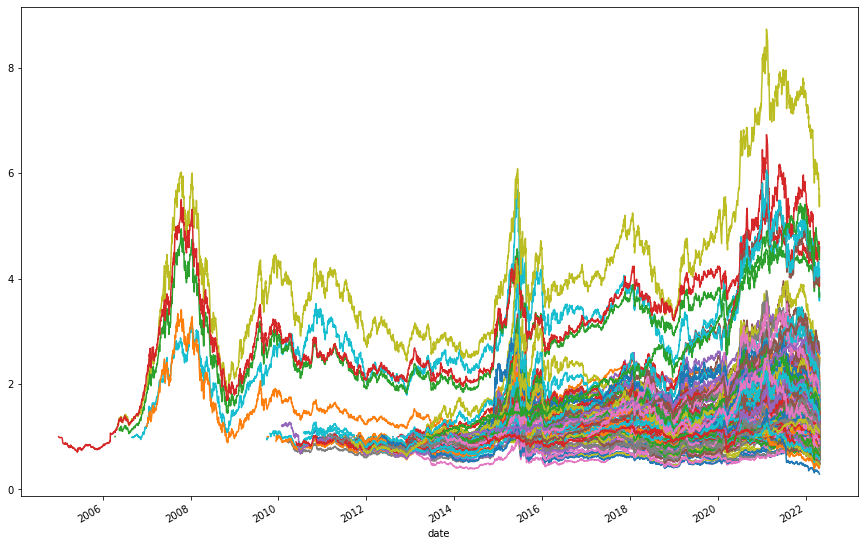

In [8]:
dataset.plot(figsize = (15, 10),
             legend = False)

##### 4. 数据清洗

In [9]:
dataset_ = dataset[dataset.index>='2020-04-01']

dataset_=dataset_.dropna(axis=1)
dataset_

,511010,511260,511310,159926,159972,511270,511020,511060,511220,511030,...,512070,159975,512980,159807,159909,159967,512170,512120,512010,159966
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,1.245,1.131,1.1506,1.168,1.0436,1.1254,1.0714,1.0351,1.2500,1.0546,...,1.9715,0.9986,0.7864,0.9901,1.5620,1.2793,1.4221,1.641,1.9305,1.2828
2020-04-02,1.245,1.129,1.1478,1.166,1.0444,1.1257,1.0694,1.0373,1.2510,1.0554,...,1.9974,1.0159,0.8045,1.0265,1.6294,1.3211,1.4545,1.664,1.9586,1.3161
2020-04-03,1.246,1.128,1.1473,1.167,1.0453,1.1275,1.0694,1.0379,1.2510,1.0556,...,1.9709,1.0093,0.7960,1.0183,1.6031,1.3248,1.4605,1.682,1.9783,1.3080
2020-04-07,1.254,1.135,1.1554,1.175,1.0521,1.1328,1.0770,1.0432,1.2530,1.0587,...,2.0092,1.0391,0.8213,1.0455,1.6552,1.3707,1.5049,1.728,2.0296,1.3508
2020-04-08,1.260,1.138,1.1585,1.182,1.0533,1.1383,1.0802,1.0451,1.2540,1.0606,...,1.9967,1.0320,0.8214,1.0406,1.6493,1.3628,1.5009,1.721,2.0212,1.3501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,1.286,1.172,1.1710,1.159,1.1086,1.1871,1.1072,1.0921,1.3214,1.1069,...,1.8108,1.3276,0.5952,1.1452,1.6836,1.9687,1.5318,1.590,1.9220,1.3869
2022-04-22,1.285,1.172,1.1705,1.158,1.1087,1.1858,1.1063,1.0923,1.3217,1.1072,...,1.8195,1.3322,0.5884,1.1358,1.6703,1.9414,1.5519,1.578,1.9252,1.3860
2022-04-25,1.287,1.174,1.1725,1.159,1.1095,1.1867,1.1080,1.0930,1.3219,1.1074,...,1.7556,1.2611,0.5467,1.0698,1.5619,1.8308,1.4787,1.491,1.8236,1.3121


#### 三. 协方差矩阵
##### 1. 计算协方差矩阵
利用pypfopt计算协方差矩阵

In [10]:
import pypfopt
pypfopt.__version__

'1.5.2'

In [11]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(dataset_, frequency=252)
sample_cov

,511010,511260,511310,159926,159972,511270,511020,511060,511220,511030,...,512070,159975,512980,159807,159909,159967,512170,512120,512010,159966
511010,0.000397,0.000410,0.000466,0.000389,0.000161,0.000219,0.000405,0.000149,0.000046,0.000062,...,-0.000237,-0.000038,-0.000033,0.000067,-0.000005,0.000183,0.000264,0.000154,0.000170,0.000107
511260,0.000410,0.000626,0.000674,0.000456,0.000180,0.000268,0.000528,0.000151,0.000043,0.000064,...,-0.000591,-0.000276,-0.000470,-0.000181,-0.000372,-0.000049,0.000151,-0.000016,0.000014,-0.000147
511310,0.000466,0.000674,0.000813,0.000530,0.000193,0.000295,0.000611,0.000165,0.000045,0.000068,...,-0.000871,-0.000385,-0.000648,-0.000261,-0.000469,-0.000150,0.000045,-0.000106,-0.000093,-0.000211
159926,0.000389,0.000456,0.000530,0.000507,0.000164,0.000239,0.000449,0.000152,0.000047,0.000068,...,-0.000393,-0.000190,-0.000207,-0.000159,-0.000259,-0.000007,0.000214,0.000016,0.000044,-0.000032
159972,0.000161,0.000180,0.000193,0.000164,0.000156,0.000121,0.000173,0.000118,0.000037,0.000048,...,-0.000017,0.000083,0.000033,0.000110,0.000038,0.000241,0.000229,0.000162,0.000153,0.000145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159967,0.000183,-0.000049,-0.000150,-0.000007,0.000241,-0.000211,0.000031,0.000162,-0.000048,-0.000052,...,0.037710,0.071022,0.044453,0.080004,0.072113,0.114204,0.082039,0.070784,0.076312,0.078368
512170,0.000264,0.000151,0.000045,0.000214,0.000229,-0.000237,0.000120,0.000222,0.000055,-0.000029,...,0.027353,0.057243,0.039622,0.064241,0.050692,0.082039,0.105268,0.083352,0.090838,0.072435
512120,0.000154,-0.000016,-0.000106,0.000016,0.000162,-0.000271,0.000010,0.000136,-0.000039,-0.000083,...,0.026719,0.051395,0.036174,0.058463,0.045237,0.070784,0.083352,0.080148,0.083830,0.061458
512010,0.000170,0.000014,-0.000093,0.000044,0.000153,-0.000296,0.000024,0.000122,-0.000012,-0.000071,...,0.029330,0.055931,0.036940,0.062715,0.047866,0.076312,0.090838,0.083830,0.090794,0.066627


##### 2. 绘制相关性图

<AxesSubplot:>

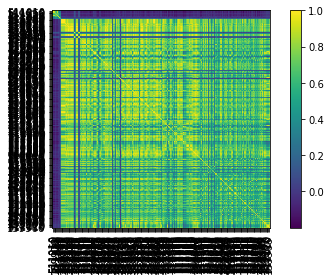

In [12]:
plotting.plot_covariance(sample_cov, plot_correlation=True)

##### 3. Ledoit-Wolf优化
For reasons discussed in the docs, the sample covariance matrix should not be your default choice. I think a better option is Ledoit-Wolf shrinkage, which reduces the extreme values in the covariance matrix. In the image below, we can see that there are fewer bright spots outside the diagonal:
样本协方差矩阵不应该是默认选择。我认为更好的选择是 Ledoit-Wolf 收缩，它减少了协方差矩阵中的极值。
在下图中，我们可以看到对角线之外的亮点较少：

In [13]:
S = risk_models.CovarianceShrinkage(dataset_).ledoit_wolf()
S

,511010,511260,511310,159926,159972,511270,511020,511060,511220,511030,...,512070,159975,512980,159807,159909,159967,512170,512120,512010,159966
511010,0.001007,0.000405,0.000460,0.000384,0.000159,0.000216,0.000400,0.000147,0.000046,0.000062,...,-0.000234,-0.000038,-0.000033,0.000066,-0.000005,0.000181,0.000260,0.000152,0.000168,0.000105
511260,0.000405,0.001233,0.000665,0.000449,0.000177,0.000265,0.000521,0.000149,0.000042,0.000063,...,-0.000583,-0.000272,-0.000464,-0.000179,-0.000367,-0.000049,0.000149,-0.000016,0.000014,-0.000145
511310,0.000460,0.000665,0.001418,0.000523,0.000190,0.000291,0.000603,0.000163,0.000045,0.000067,...,-0.000859,-0.000380,-0.000639,-0.000258,-0.000463,-0.000148,0.000044,-0.000105,-0.000092,-0.000208
159926,0.000384,0.000449,0.000523,0.001116,0.000162,0.000236,0.000443,0.000150,0.000046,0.000067,...,-0.000387,-0.000188,-0.000204,-0.000156,-0.000256,-0.000007,0.000211,0.000016,0.000043,-0.000032
159972,0.000159,0.000177,0.000190,0.000162,0.000769,0.000120,0.000171,0.000116,0.000037,0.000047,...,-0.000017,0.000082,0.000033,0.000109,0.000038,0.000238,0.000226,0.000159,0.000151,0.000143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159967,0.000181,-0.000049,-0.000148,-0.000007,0.000238,-0.000208,0.000031,0.000160,-0.000048,-0.000052,...,0.037208,0.070076,0.043861,0.078938,0.071152,0.113299,0.080947,0.069841,0.075295,0.077324
512170,0.000260,0.000149,0.000044,0.000211,0.000226,-0.000234,0.000119,0.000219,0.000054,-0.000029,...,0.026989,0.056480,0.039094,0.063385,0.050017,0.080947,0.104481,0.082242,0.089628,0.071470
512120,0.000152,-0.000016,-0.000105,0.000016,0.000159,-0.000268,0.000010,0.000135,-0.000038,-0.000082,...,0.026363,0.050710,0.035692,0.057684,0.044635,0.069841,0.082242,0.079696,0.082713,0.060640
512010,0.000168,0.000014,-0.000092,0.000043,0.000151,-0.000292,0.000023,0.000120,-0.000012,-0.000070,...,0.028939,0.055186,0.036448,0.061879,0.047229,0.075295,0.089628,0.082713,0.090201,0.065740


<AxesSubplot:>

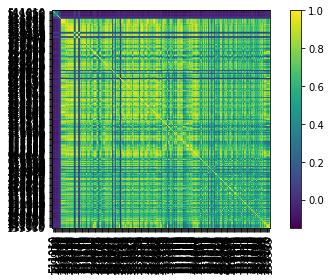

In [14]:
plotting.plot_covariance(S, plot_correlation=True)

#### 四. 收益估计
正如文档中所讨论的，使用简单的估计值（例如过去收益的平均值）来提供收益通常不是一个好主意。除非您有估算回报的专有方法，否则研究表明您最好不要提供预期回报——然后您可以找到 min_volatility() 投资组合或使用 HRP。

然而，在这个例子中，我们将使用 CAPM 回报，其目的是比默认的平均历史回报稍微稳定一些。请参阅笔记本 1-RiskReturnModels.ipynb 了解更多信息。

In [15]:
from pypfopt import expected_returns
mu = expected_returns.capm_return(dataset_)
mu

511010    0.019749
511260    0.019136
511310    0.018787
159926    0.019390
159972    0.020115
            ...   
159967    0.129471
512170    0.106671
512120    0.099234
512010    0.105022
159966    0.108810
Name: mkt, Length: 250, dtype: float64

<AxesSubplot:>

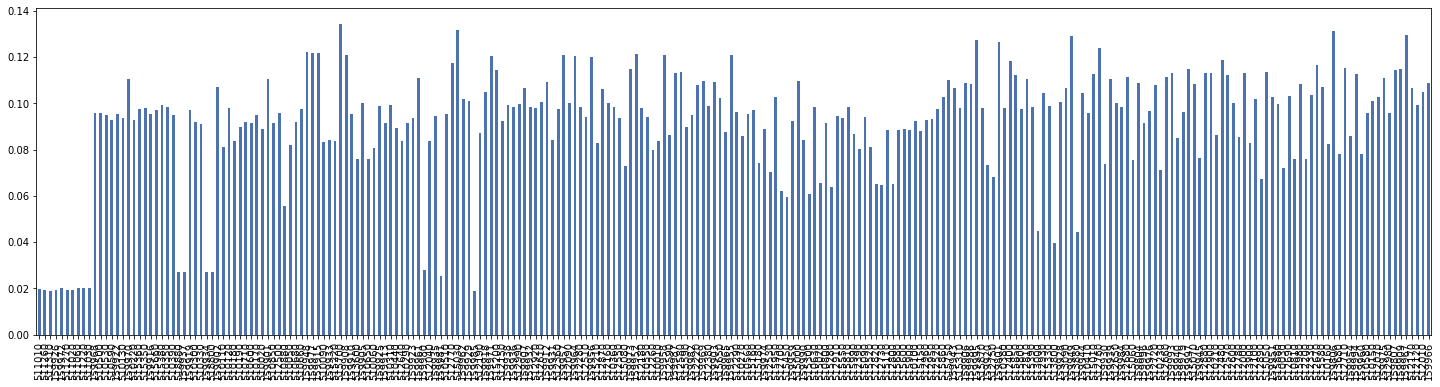

In [16]:
mu.plot.bar(figsize = (25,6))

#### 五. 最小方差
在本节中，我们构建了一个以最小化方差为目标的多头/空头投资组合。大量研究表明，这些全局最小方差 (GMV) 投资组合的表现优于均值方差优化的投资组合。

In [17]:
from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(dataset_).ledoit_wolf()
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([(511010, 0.05505),
             (511260, 0.02966),
             (511310, 0.00947),
             (159926, 0.04253),
             (159972, 0.12578),
             (511270, 0.10375),
             (511020, 0.03656),
             (511060, 0.1284),
             (511220, 0.20208),
             (511030, 0.19291),
             (159968, -0.00267),
             (510500, -0.00539),
             (510530, -0.00146),
             (510590, 0.00383),
             (159922, -0.00689),
             (510130, 0.00641),
             (159970, -0.00072),
             (510220, -0.00225),
             (515360, 0.00765),
             (515350, -0.00343),
             (159916, -0.0047),
             (515660, -0.00156),
             (515380, -0.00741),
             (510350, -0.00476),
             (510390, 0.0078),
             (518880, -0.0006),
             (159937, 0.00068),
             (159919, 0.00313),
             (510300, 0.0191),
             (510330, 0.02245),
             (159934, 0.00069),
 

<AxesSubplot:>

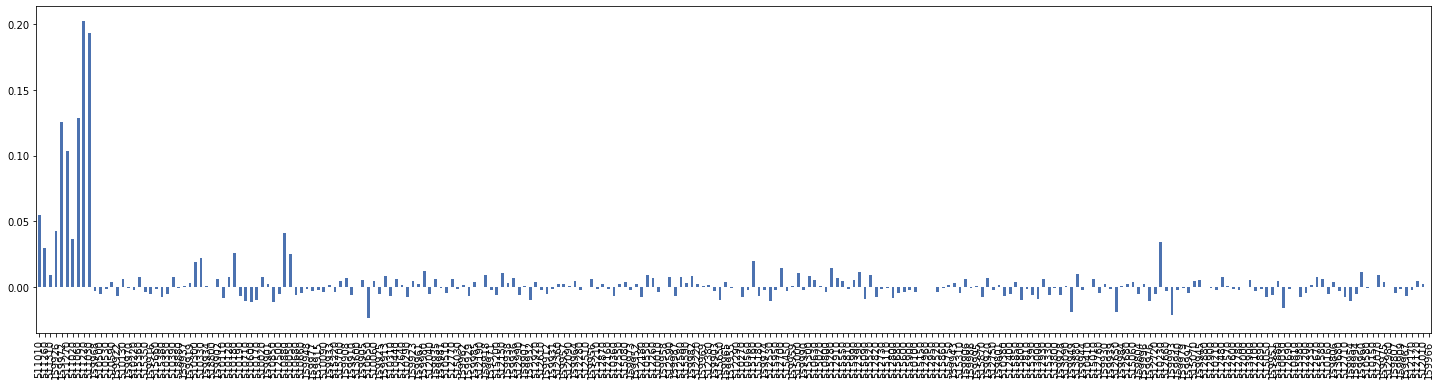

In [18]:
pd.Series(weights).plot.bar(figsize = (25, 6))

我们可以快速了解投资组合的表现，如下所示。请注意，这是一个样本估计，可能与投资组合的实际表现几乎没有相似之处！

In [21]:
ar, av, shp = ef.portfolio_performance(verbose=True)
print(ar,av,shp)

Annual volatility: 1.2%
None 0.012404147111250702 None


In [22]:
dataset_

,511010,511260,511310,159926,159972,511270,511020,511060,511220,511030,...,512070,159975,512980,159807,159909,159967,512170,512120,512010,159966
date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,1.245,1.131,1.1506,1.168,1.0436,1.1254,1.0714,1.0351,1.2500,1.0546,...,1.9715,0.9986,0.7864,0.9901,1.5620,1.2793,1.4221,1.641,1.9305,1.2828
2020-04-02,1.245,1.129,1.1478,1.166,1.0444,1.1257,1.0694,1.0373,1.2510,1.0554,...,1.9974,1.0159,0.8045,1.0265,1.6294,1.3211,1.4545,1.664,1.9586,1.3161
2020-04-03,1.246,1.128,1.1473,1.167,1.0453,1.1275,1.0694,1.0379,1.2510,1.0556,...,1.9709,1.0093,0.7960,1.0183,1.6031,1.3248,1.4605,1.682,1.9783,1.3080
2020-04-07,1.254,1.135,1.1554,1.175,1.0521,1.1328,1.0770,1.0432,1.2530,1.0587,...,2.0092,1.0391,0.8213,1.0455,1.6552,1.3707,1.5049,1.728,2.0296,1.3508
2020-04-08,1.260,1.138,1.1585,1.182,1.0533,1.1383,1.0802,1.0451,1.2540,1.0606,...,1.9967,1.0320,0.8214,1.0406,1.6493,1.3628,1.5009,1.721,2.0212,1.3501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-21,1.286,1.172,1.1710,1.159,1.1086,1.1871,1.1072,1.0921,1.3214,1.1069,...,1.8108,1.3276,0.5952,1.1452,1.6836,1.9687,1.5318,1.590,1.9220,1.3869
2022-04-22,1.285,1.172,1.1705,1.158,1.1087,1.1858,1.1063,1.0923,1.3217,1.1072,...,1.8195,1.3322,0.5884,1.1358,1.6703,1.9414,1.5519,1.578,1.9252,1.3860
2022-04-25,1.287,1.174,1.1725,1.159,1.1095,1.1867,1.1080,1.0930,1.3219,1.1074,...,1.7556,1.2611,0.5467,1.0698,1.5619,1.8308,1.4787,1.491,1.8236,1.3121


假设我们对这个投资组合感到满意，并想真正出去购买股票。为此，我们需要构建离散分配（除非您的经纪人支持小数股！）
如果我们有 100,000,000元的投资并且希望我们的投资组合是 130/30 的多头/空头，我们可以按如下方式构建实际分配：

In [ ]:
from pypfopt import DiscreteAllocation

latest_Prices = dataset_.iloc[-1]
da = DiscreteAllocation(weights, latest_Prices, total_portfolio_value=100000000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

NameError: name 'dataset_' is not defined